In [1]:
import node
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nuforc_reports.csv')
df.head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582


### Create Vect Obj

In [3]:
shapes = node.vect('shape')
shapes.set_up(df['shape'],True)
shapes.basic_stats(False) 
v=0
for p in np.unique(shapes.vector):
    v += shapes.pdf_from_mu_vect[p]
print(v)
#shapes.pdf()
print(shapes.pdf_from_mu_vect[14])


3.84
entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116
0.9999999999999999
0.09320385974782003


In [4]:
time = node.vect('duration')
time.set_up(df['duration'],False,True)

### Create Point & Apply KNN

In [5]:
state = node.vect('state')
state.set_up(list(df['state']),True)

x,y = state.create_corr_vectors(100,.09)
x = [abs(round(i,4)+1) for i in x]
y = [abs(round(i,4)+1) for i in y]

testNode = node.node(x[0],y[0],0,'test')
p = node.point(x, y,'shape_duration') 

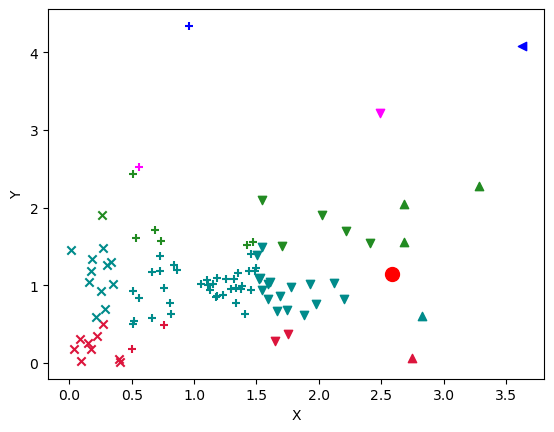

[(0.0, (0.5184, 0.5398000000000001), 'shape_duration'),
 (0.0382, (0.5087999999999999, 0.5028), 'shape_duration'),
 (0.1487, (0.6635, 0.5721), 'shape_duration'),
 (0.2455, (0.7595000000000001, 0.49339999999999995), 'shape_duration'),
 (0.2523, (0.26970000000000005, 0.49750000000000005), 'shape_duration')]

In [6]:
# TODO Pipe label from vector class to point class
# TODO If normed, adjust rounding in knn_predict graph creation
p.knn_predict(testNode,False)

### Create More Vects

In [7]:
time_seen = node.vect('time_seen')
time_seen.set_up(list(df['duration']),False,True)

In [8]:
time_seen.pdf_from_mu(True)

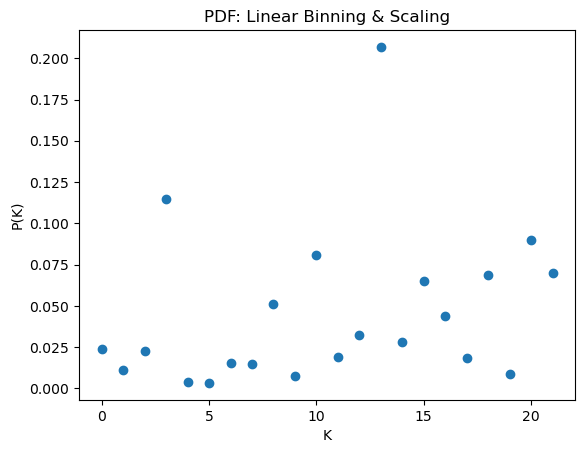

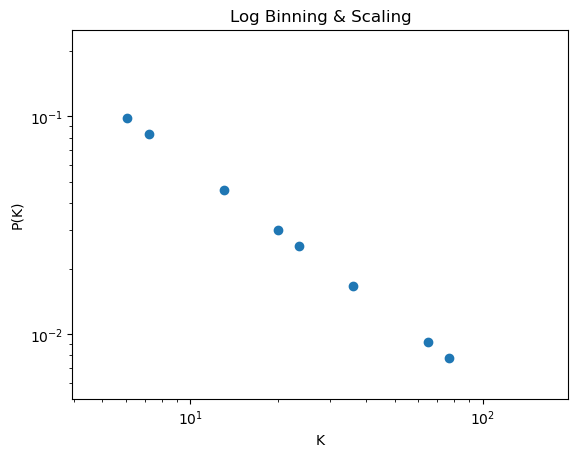

3.84


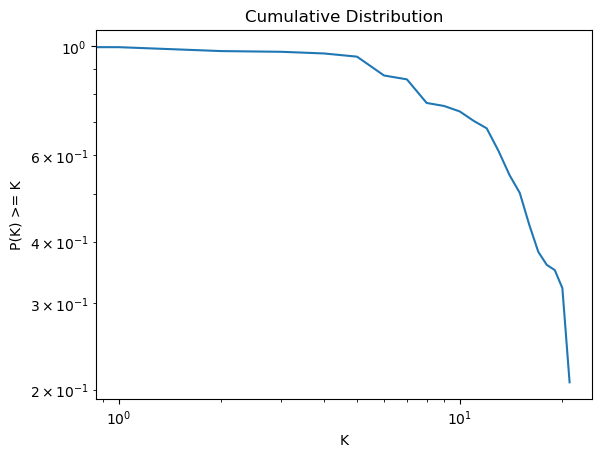

entropy: 3.84
variance: 15947509.368027031
vector_mu: 4005.681818181818
std: 3993.4332807782116


In [9]:
shapes.basic_stats(True)

### Linear Regression & Outlier Cleaning

m = 1.8722377568792374 
b = -0.8722377568792374


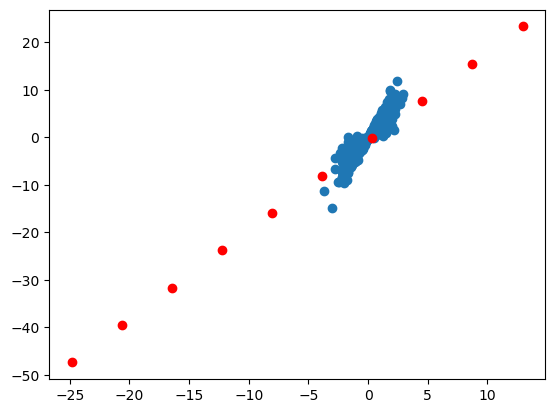

array([-47.39020055, -39.52998929, -31.66977803, -23.80956677,
       -15.94935551,  -8.08914425,  -0.22893299,   7.63127827,
        15.49148953,  23.35170079])

In [10]:
x,y = shapes.create_corr_vectors(1000,3)
p2 = node.point(x,y,'corr_v') 
p2.linear_regression()

m = 1.8676786319265664 
b = -0.8676786319265664


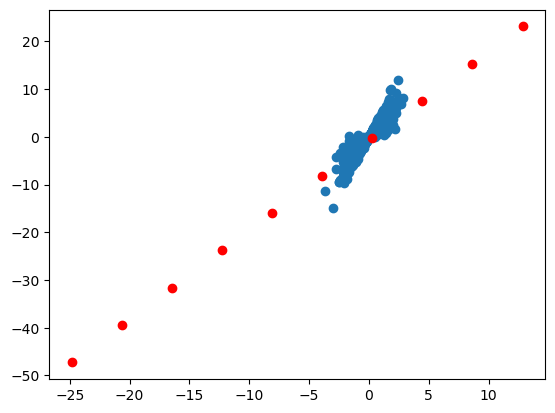

array([-47.27236457, -39.45183813, -31.6313117 , -23.81078527,
       -15.99025883,  -8.1697324 ,  -0.34920596,   7.47132047,
        15.2918469 ,  23.11237334])

In [11]:
p2.remove_extreme_outlier()
p2.linear_regression()

In [12]:
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
X = [[1], [3], [5], [7]]

y = [0, 0, 1, 1]

p3 = node.LogisticR(X,y)

p3.logistic_regression_fit()


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5645445967628233
Cost after iteration 200: 0.5327983674120171
Cost after iteration 300: 0.5042398083802323
Cost after iteration 400: 0.47850631933147614
Cost after iteration 500: 0.45528012224693837
Cost after iteration 600: 0.4342728590483562
Cost after iteration 700: 0.4152263237245347
Cost after iteration 800: 0.39791155268641
Cost after iteration 900: 0.38212691971529367


In [13]:
p3.log_predict([[1], [6], [2]])

array([0., 1., 0.])

In [14]:
p3.y_pred

array([0.2842074 , 0.83681587, 0.3984317 ])

In [15]:
# TODO graphing function logistice regression

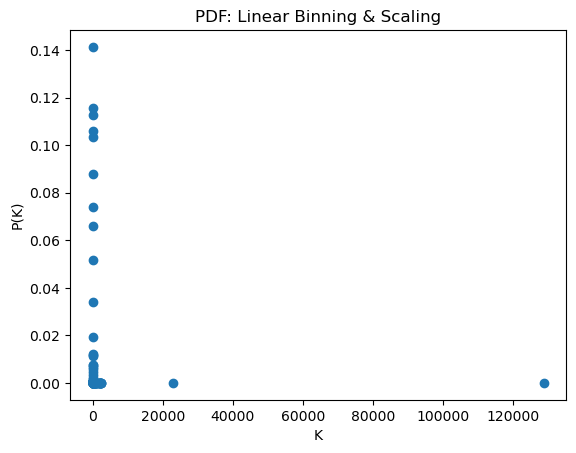

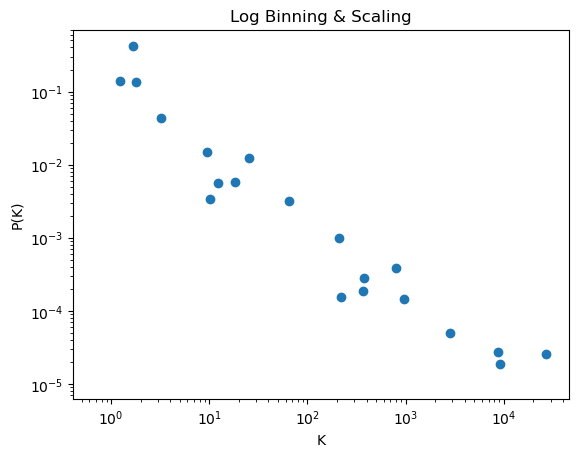

3.81


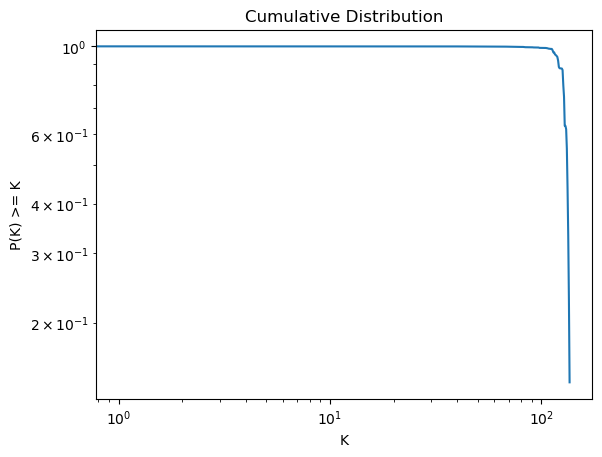

entropy: 3.81
variance: 593163.9336162668
vector_mu: 643.2481751824818
std: 770.1713663959904


In [16]:
time.basic_stats()


In [17]:

lat = node.vect('city_latitude')
lat.set_up(df['city_latitude'],False,False)
#lat.vector = [round(x,2) for x in lat.vector]

lon = node.vect('city_longitude')
lon.set_up(df['city_longitude'],False,False)
#lon.vector = [round(x,2) for x in lon.vector]



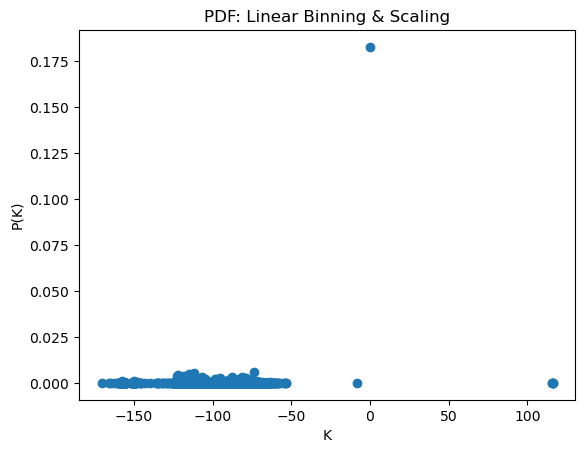

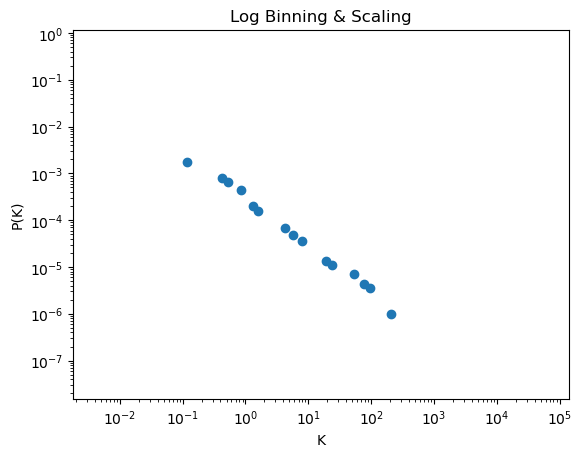

10.51


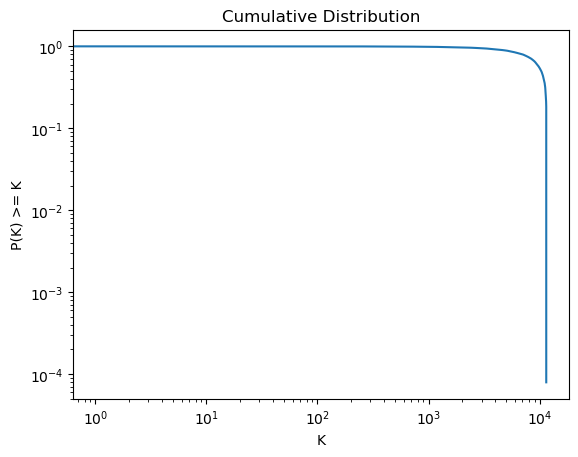

entropy: 10.51
variance: 8806.807050816864
vector_mu: 7.684426229508197
std: 93.84458988570873


In [18]:
lon.basic_stats()

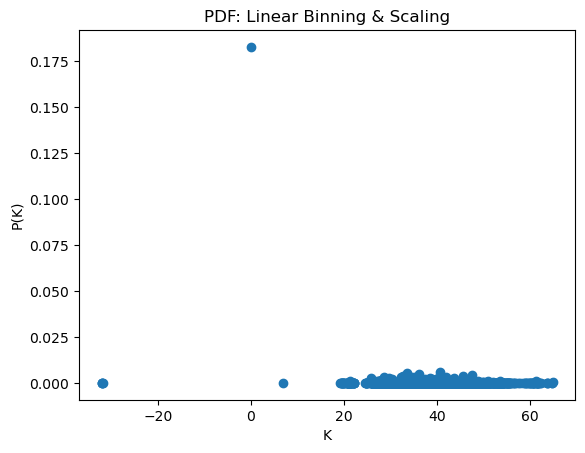

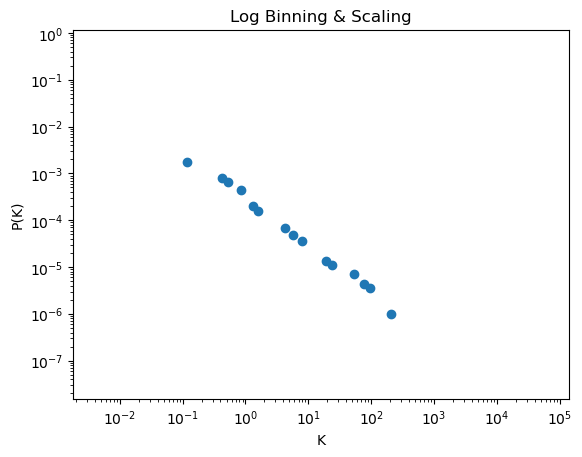

10.51


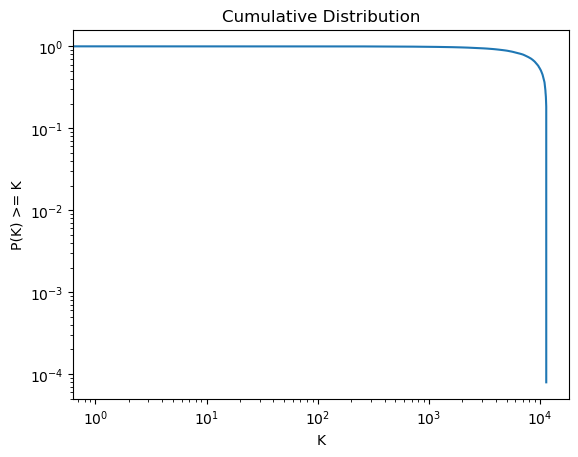

entropy: 10.51
variance: 813.4666183968774
vector_mu: 7.737050043898156
std: 28.52133619585305


In [19]:
lat.basic_stats()

In [20]:
lat_lon = node.point(lat.vector,lon.vector,'location')


In [21]:
testNode = node.node(lat_lon.x[0],lat_lon.y[0],0,'test')

#lat_lon.knn_predict(testNode)

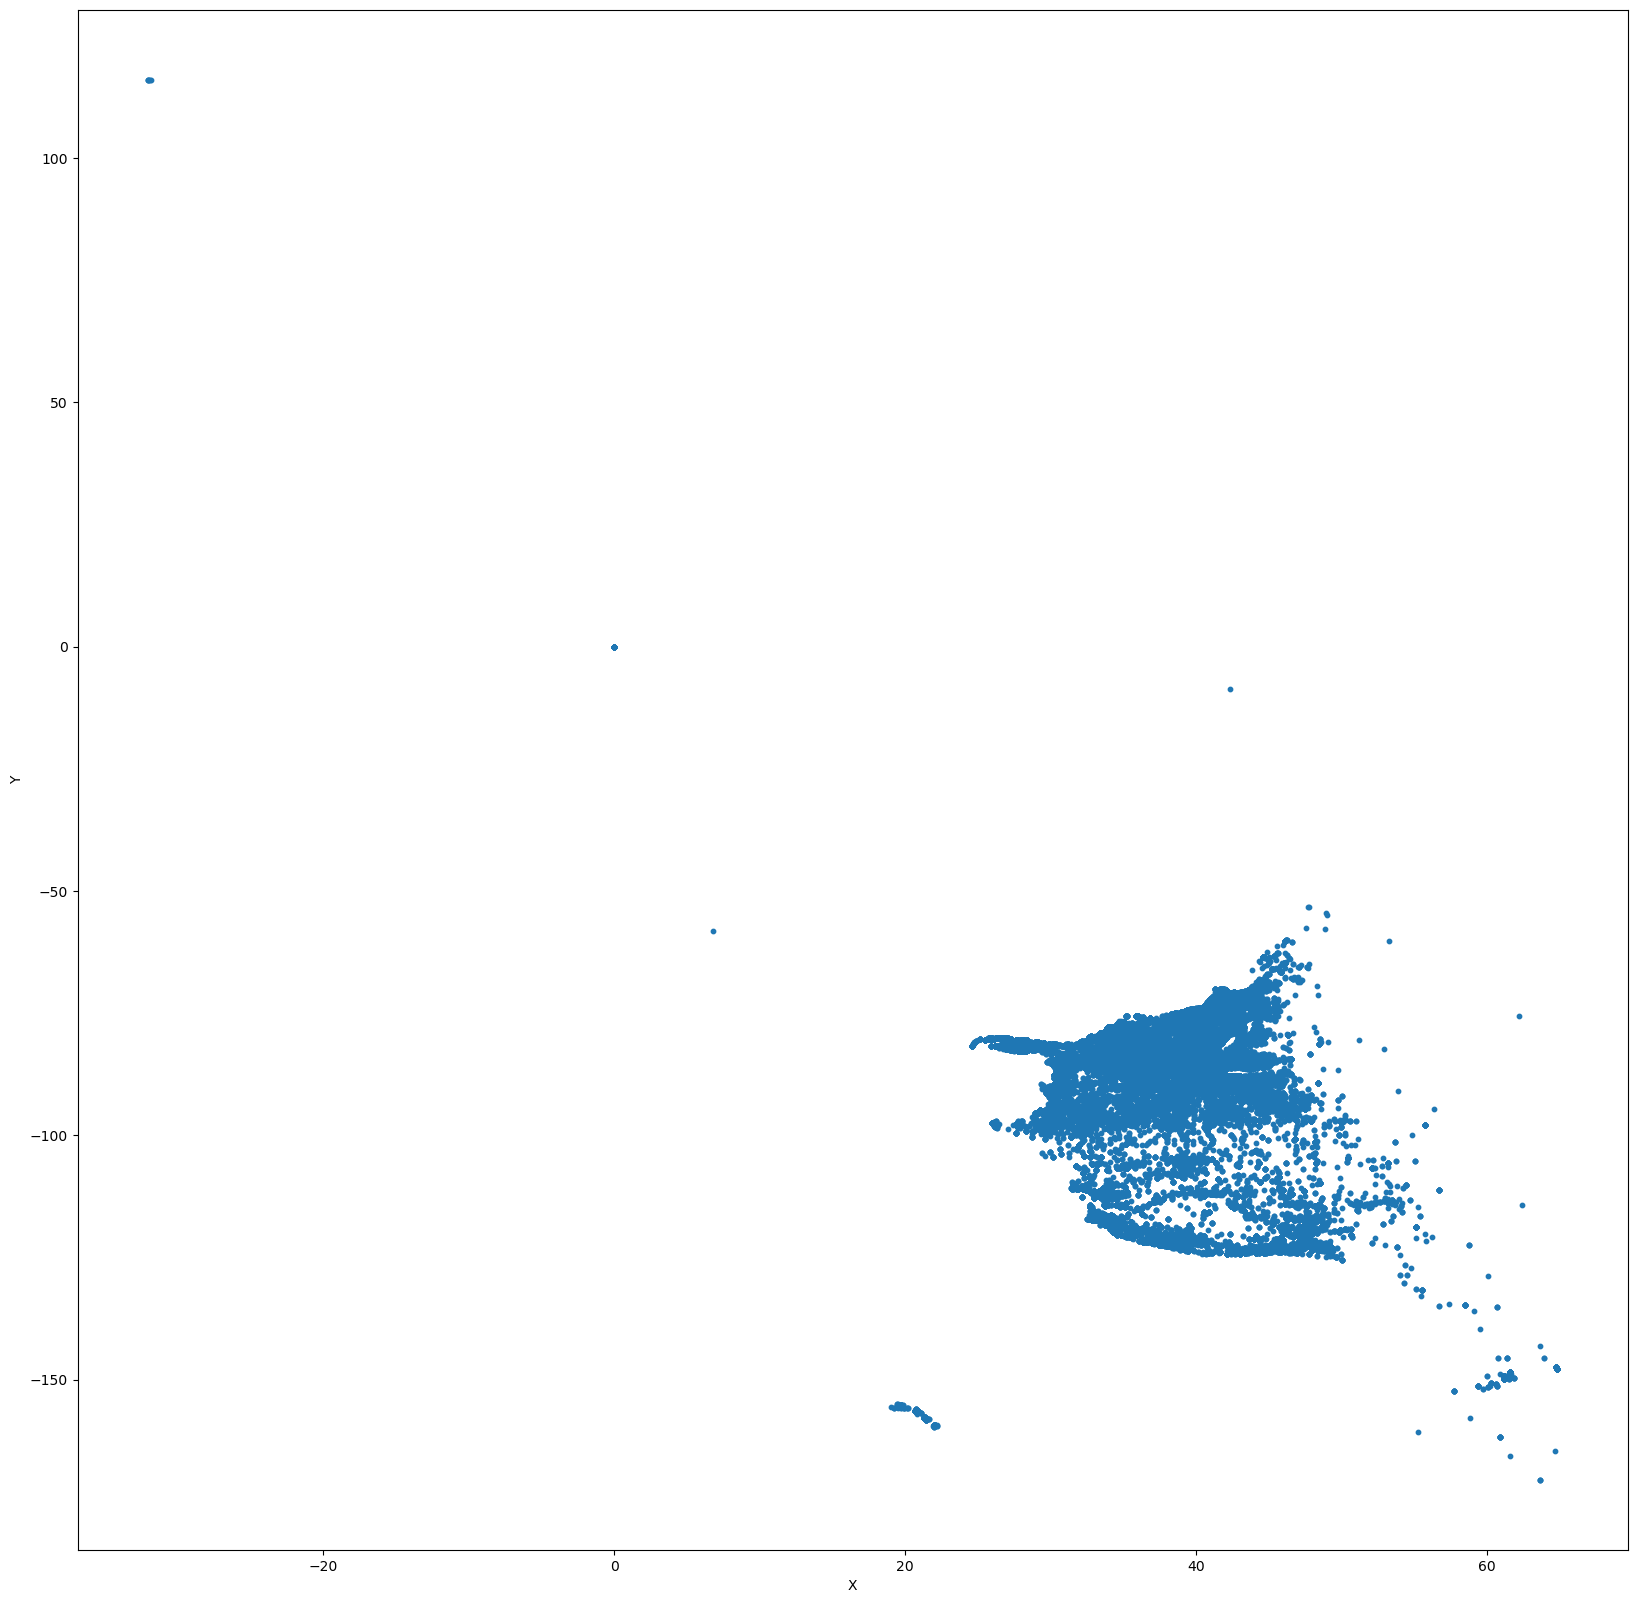

In [22]:
lat_lon.simple_knn()